# Regresión Logística

## Un atributo

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [8]:
def sigmoid_function(x,w0, w1):
    '''Equivalente a perceptron con funcion de activacion sigmoide'''    
    z = w0 + w1*x #notar que es una funcion lineal
    y = 1/(1 + np.exp(-z))   #notar que es una composicion
    return y

In [10]:
# Generación de datos. Un atributo, dos clases.
X, y = make_blobs(n_samples=1000, centers=2, n_features=1,
                  random_state=1, cluster_std= 1.5) # Esto es simular datos

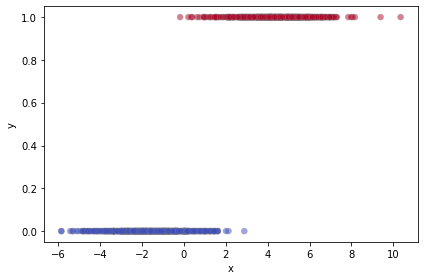

In [11]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [12]:
clf = LogisticRegression().fit(X,y)

In [13]:
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.974

In [14]:
# Parámetros obtenidos
print(clf.coef_, clf.intercept_)

[[2.44855129]] [-3.39207913]


Con estos parámetros, podemos graficar la curva obtenida por la regresión logística. Ojo, ésta NO es la frontera de decisión. Usamos la función que definimos más arriba, `sigmoid_function`.

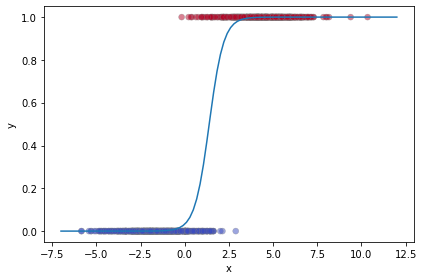

In [17]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Otra forma de obtener esa curva habría sido usando el método `predict_proba` del clasificador:

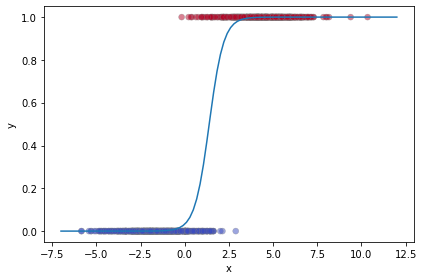

In [18]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-7,12,100)
y_plot = clf.predict_proba(x_plot.reshape(-1,1))[:,1]
plt.plot(x_plot, y_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

## Dos atributos

In [19]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=1, cluster_std= 2.0)

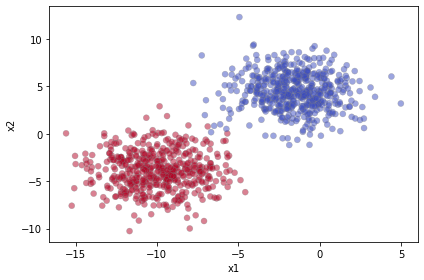

In [20]:
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

In [21]:
clf = LogisticRegression().fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.998

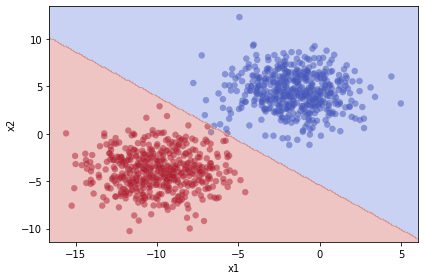

In [22]:
# Gráfico de la frontera obtenida
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap =cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.savefig('RL_2D_2.png', dpi = 300)
plt.show()

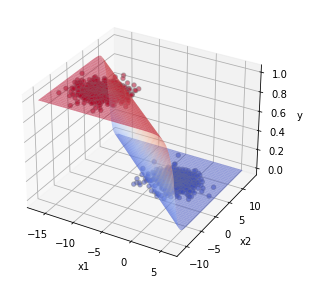

In [23]:
# Gráfico de la probabilidad
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],y, c = y,alpha = 0.5, lw = 1, edgecolors= 'grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = (clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]).reshape(xx.shape)


surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=True, alpha = 0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
# plt.savefig('RL_2D_3.png', dpi = 300)

plt.show()


## Caso práctico

Se desea predecir la probabilidad que tiene un estudiante de aprobar un examen en función de las horas que ha estudiado. Tener en cuenta que en los datos para 1.75 horas de estudio, hay un estudiante que aprueba y otro que no.

In [24]:
import numpy as np

X = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [25]:
from sklearn.linear_model import LogisticRegression

regresion_logistica = LogisticRegression()

regresion_logistica.fit(X,y)

LogisticRegression()

In [26]:
# Predicción para 1,2,3,4,5,6 horas de estudio
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)

# Paso 6: Usa el modelo entrenado para obtener las predicciones con datos nuevos
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)
# produce el resultado: [0 0 1 1 1 1]

[0 0 1 1 1 1]


Interpretación:
+ Estudiar 1 ó 2 horas --> lo más probable es perder el examen.
+ Estudiar 3 o más horas --> lo más probable es aprobar.

Ahora las probabilidades:

In [27]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.87984046 0.12015954]
 [0.69895285 0.30104715]
 [0.42402118 0.57597882]
 [0.18924992 0.81075008]
 [0.06891381 0.93108619]
 [0.02293029 0.97706971]]


In [29]:
# Las probabilidades de aprobar son la col 2

print(probabilidades_prediccion[:,1])

[0.12015954 0.30104715 0.57597882 0.81075008 0.93108619 0.97706971]


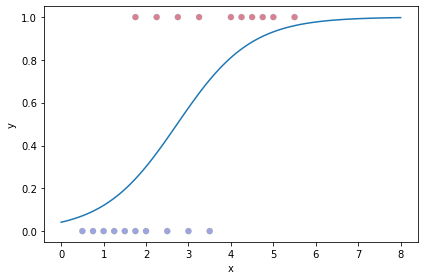

In [35]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(0,8,100)
plt.plot(x_plot, sigmoid_function(x_plot,regresion_logistica.intercept_[0], regresion_logistica.coef_[0][0]))

plt.xlabel('Horas de estudio')
plt.ylabel('Aprobar / No aprobar examen')
plt.tight_layout()
plt.show()

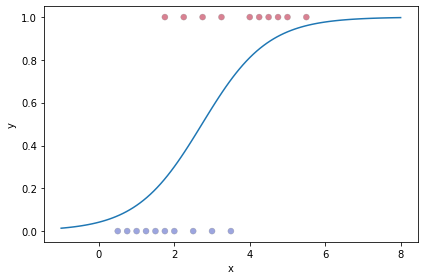

In [36]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-1,8,100)
y_plot = regresion_logistica.predict_proba(x_plot.reshape(-1,1))[:,1]
plt.plot(x_plot, y_plot)

plt.xlabel('Horas de estudio')
plt.ylabel('Aprobar / No aprobar examen')
plt.tight_layout()
plt.show()